## 📌 `sklearn.decomposition` and SVD

The `sklearn.decomposition` module provides dimensionality reduction tools such as **PCA** and **TruncatedSVD**, both based on **Singular Value Decomposition (SVD)** ✨.

- 📊 **PCA** uses SVD to extract principal components after mean-centering the data.
- 🧠 **TruncatedSVD** applies SVD without mean-centering, making it suitable for **sparse data** and **text analysis** (e.g., **Latent Semantic Analysis**).

# 🔍 SVD  
## Singular Value Decomposition

SVD is a powerful matrix factorization technique that decomposes a matrix $A$ into three components:

### ⚙️ Decomposition
1. $A$ is factorized as $A = U \Sigma V^T$
2. $U$ and $V$ are **orthogonal matrices**:  
   - $U^T U = I$  
   - $V^T V = I$
3. $\Sigma$ is a **diagonal matrix** with non-negative **singular values** $\sigma_i$, sorted in descending order.

### 📌 Applications
SVD is widely used in:
- 📉 Dimensionality reduction  
- 🔇 Noise filtering  
- 🖼️ Image compression  
- 📦 Data compression

---

### 🧮 SVD Formula  
$$
A = U \cdot \Sigma \cdot V^T
$$

Where:  
- $A$ is an $m \times n$ matrix  
- $\Sigma$ is an $m \times n$ diagonal matrix with singular values $\sigma_i$  
- $U$ is an $m \times m$ orthogonal matrix of **left singular vectors** ($\mathbf{u}_i$)  
- $V^T$ is an $n \times n$ orthogonal matrix of **right singular vectors** ($\mathbf{v}_i^T$)
 

>### 📌 Explicit Matrix Representation  
>$$\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n} \\a_{21} & a_{22} & \dots & a_{2n} \\\vdots & \vdots & \ddots & \vdots \\a_{m1} & a_{m2} & \dots & a_{mn}\end{bmatrix}=\begin{bmatrix}\mathbf{u_1} \\\mathbf{u_2} \\\vdots \\\mathbf{u_m}\end{bmatrix}\cdot\begin{bmatrix}\sigma_1 & 0 & \dots & 0 \\0 & \sigma_2 & \dots & 0 \\\vdots & \vdots & \ddots & \vdots \\0 & 0 & \dots & \sigma_r \\0 & 0 & \dots & 0 \\\vdots & \vdots & \ddots & \vdots \\0 & 0 & \dots & 0\end{bmatrix}\cdot\begin{bmatrix}\mathbf{v_1^T} & \mathbf{v_2^T} & \dots & \mathbf{v_n^T}\end{bmatrix}$$

### 🔹 SVD Properties  
- The **rank** of $A$ equals the number of non-zero singular values in $\Sigma$.  
- The **first few singular values** capture most of the variance in the data.  
- **Low-rank approximation**: Truncating $\Sigma$ enables an efficient approximation of $A$ while reducing data size.

---

### 🔹 Applications  
✔ **Dimensionality Reduction** – Used in **PCA** to extract key features.  
✔ **Noise Reduction** – Filters out low-energy (less significant) components.  
✔ **Recommender Systems** – Supports latent factor models for personalized suggestions.  
✔ **Image Compression** – Retains essential visual structure while reducing file size.  
✔ **Latent Semantic Analysis (LSA)** – In NLP, identifies patterns between documents and the terms they contain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from PIL import Image
from scipy.interpolate import interp1d

### 🧪 Simple Example: SVD on a Matrix using NumPy

Here's a minimal example showing how to perform **Singular Value Decomposition** using `numpy.linalg.svd`:

In [2]:
A = np.array([[0, 0.25, 0],
                   [-2, 0, 0]])

u, s, vt = np.linalg.svd(A)

In [3]:
# convert Σ (s) to a matrix with the correct shape.
sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(sigma, s)


print("U".ljust(20) + "Σ".ljust(20) + "Vᵀ")
for row_u, row_s, row_v in zip(u.tolist(), sigma.tolist(), vt.T.tolist()):
    line = (str(row_u).ljust(20) +
            str(row_s).ljust(20) +
            str(row_v))
    print(line)

U                   Σ                   Vᵀ
[0.0, 1.0]          [2.0, 0.0, 0.0]     [-1.0, 0.0, 0.0]
[1.0, 0.0]          [0.0, 0.25, 0.0]    [0.0, 1.0, 0.0]


> ### ⚠️ Important:
>
> - `np.linalg.svd()` returns **Σ** (singular values) as a **1D vector**, not a diagonal matrix.  
> - To reconstruct the original matrix, you need to convert Σ into a diagonal matrix of appropriate shape.  
```python
# convert Σ (s) to a matrix with the correct shape.
sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(sigma, s)
```

#### 🔄 Reconstructing the Matrix from SVD:

In [4]:
reconstructed_matrix  = u @ sigma @ vt
reconstructed_matrix 

array([[ 0.  ,  0.25,  0.  ],
       [-2.  ,  0.  ,  0.  ]])

# 🔄 One Use: Linear Approximation

One interesting application of **SVD** is **linear approximation**, which can be used in a variety of machine learning tasks, similarly to **linear regression**.

### ⚙️ How it works:
- **SVD-based approximation** is essentially a way to approximate data in a lower-dimensional space.
- Just as **linear regression** finds a best-fit line by minimizing errors, **SVD** minimizes the reconstruction error by keeping only the most significant singular values.

### 📊 Example:
In machine learning, **SVD** can be used to find an approximate model of the data, capturing its most important features while reducing the dimensionality.

📝 **Key Points**:
- **Low-rank approximation** reduces the dimensionality, allowing for faster computations and simplified models.
- Similar to linear regression, **SVD** identifies the most important components of the data while minimizing error.

In [5]:
# Define matrix A (features x samples)
A = np.array([[2, 1],
              [4, 3],
              [0, -2],
              [-2, -6]])

# Apply SVD
U, S, VT = np.linalg.svd(A)

# Keep only top k singular values for low-rank approximation
k = 1  # Number of singular values to keep
Sigma_k = np.zeros((U.shape[0], VT.shape[0]))
np.fill_diagonal(Sigma_k, S[:k])

# Reconstruct the approximation of A with reduced rank
A_approx = U[:, :k] @ Sigma_k[:k, :k] @ VT[:k, :]

# Calculate the average of the original dataset and Add the average back to the reconstructed dataset
avg_A_sum = sum(A) / A.shape[0]
A_approx += avg_A_sum


print("Original Matrix:\n", A)
print("\nLow-rank Approximation (k=1):\n", A_approx)

Original Matrix:
 [[ 2  1]
 [ 4  3]
 [ 0 -2]
 [-2 -6]]

Low-rank Approximation (k=1):
 [[ 2.          0.61803399]
 [ 3.4472136   2.95967478]
 [ 0.10557281 -2.4472136 ]
 [-2.23606798 -6.23606798]]


# 🔄 Comparing to Linear Regression

Now, let's compare the reconstructed dataset from **SVD** with a **Linear Regression** model to see how they align.

### ⚙️ Steps:
1. **Fit a Linear Regression model** using the first dimension as the independent variable and the second dimension as the dependent variable.
2. **Predict the values** of $y$ using the fitted linear model.
####  **Plot the results** of both the linear regression model and the SVD approximation.

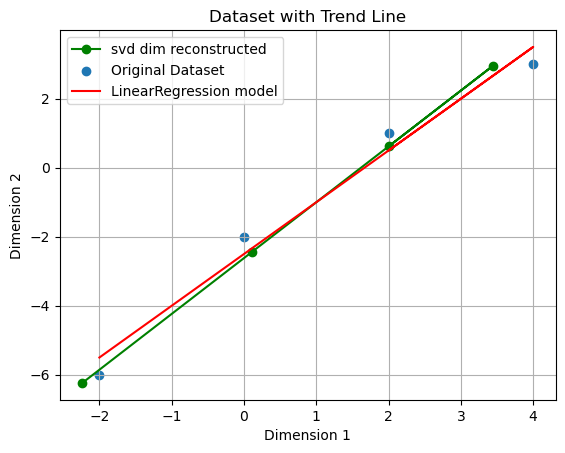

In [6]:
# Separate the dimensions
x = A[:, 0]
y = A[:, 1]

# Fit a linear regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Predict y values using the model
y_pred = model.predict(x.reshape(-1, 1))



# SVD Reconstruction Line (from the approximated A)
x2 = A_approx[:, 0]
y2 = A_approx[:, 1]

plt.plot(x2, y2, marker='o', linestyle='-', color='g', label='svd dim reconstructed')

plt.scatter(x, y, label='Original Dataset')
plt.plot(x, y_pred, color='red', label='LinearRegression model')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Dataset with Trend Line')
plt.legend()
plt.grid(True)
plt.show()

We will notice that the methods lead to **different approximations** because they are based on different error minimization strategies.  
- **Linear Regression** minimizes the squared distance between the data points and the regression line, essentially finding the **k-dimensional hyperplane** that minimizes the squared distance to the data points along the (k+1)-st dimension.
- **SVD**, on the other hand, minimizes the squared distance from the points to the **plane** defined by the most significant singular vectors. It captures the best fit in a lower-dimensional subspace, thus approximating the data.

For more details, you can read [wolfram Least Squares Fitting on the difference between SVD and Linear Regression](https://mathworld.wolfram.com/LeastSquaresFitting.html).

![image.png](https://qph.cf2.quoracdn.net/main-qimg-fabbfebd213b6e560a9d2aeccc4a9e39)

### 🖼️ Image Compression Using SVD

- 📦 **Data compression** is the process of reducing the size of data while preserving its essential information. In the context of images, this means approximating an image matrix in a way that keeps most of the important features but uses fewer resources (e.g., memory or storage).

# 🔄 Let's Build the Function: Image Compression Comparison

Now, let's create a function that compares the compression of several images using **SVD**. This function will allow us to evaluate how different values of **k** (number of singular values kept) affect the quality and compression of the image.


In [7]:
# Compressing an image using SVD
def img_compression(image_path, gray_boolean=False, compression=10):
    image = Image.open(image_path)
    if gray_boolean:
        image = image.convert("L")

    # Convert image to matrix
    image_matrix = np.array(image)

    # Perform SVD
    u, s, vt = np.linalg.svd(image_matrix, full_matrices=False)

    # Compress by retaining top k singular values
    k = int(compression)
    compressed_s = np.diag(s[:k])
    compressed_u = u[:, :k]
    compressed_vt = vt[:k, :]

    # Reconstruct image
    reconstructed_image_matrix = compressed_u @ compressed_s @ compressed_vt
    return reconstructed_image_matrix

In [8]:

# compresst_img=img_compression(image_path,True,tims)
def comper_two(image_path,tims=10,gray_boolean=False):
    
    
    image = Image.open(image_path)
    if (gray_boolean==True):
        image = image.convert("L")
        reconstructed_image_matrix = img_compression(image_path,gray_boolean,tims)
        cmap='gray'
    else:
        reconstructed_image_matrix = img_compression_color(image_path,tims)
        
    image_matrix = np.array(image)
    # Step 7: Display the original and reconstructed images
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    if (gray_boolean==True):
        plt.imshow(image_matrix, cmap)
    else:
        plt.imshow(image_matrix)
        
    plt.title('Original Image')
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(1, 2, 2)
    if (gray_boolean==True):
        plt.imshow(reconstructed_image_matrix, cmap)
    else:
        plt.imshow(reconstructed_image_matrix.astype(np.uint8))
    plt.title('Compressed Image by k: {} '.format(round(tims,2)))
    plt.axis('off')

    plt.show()

In [9]:
def img_compression_color(image_path,compression=10):

    # Step 1: Load the image
    image = Image.open(image_path)
    

    # Step 3: Convert the image data into a matrix
    image_matrix = np.array(image)
    # Step 3: Separate color channels (assuming RGB image)
    red_channel = image_matrix[:, :, 0]
    green_channel = image_matrix[:, :, 1]
    blue_channel = image_matrix[:, :, 2]

    k =int(compression)
    # Step 4: Perform SVD on each color channel
    def compress_channel(channel, k):
        u, s, vt = np.linalg.svd(channel, full_matrices=False)
        compressed_s = np.diag(s[:k])
        compressed_u = u[:, :k]
        compressed_vt = vt[:k, :]
        reconstructed_channel = compressed_u @ compressed_s @ compressed_vt
        return reconstructed_channel
    
    # Step 4: Perform SVD on the image matrix
    #u, s, vt = np.linalg.svd(image_matrix, full_matrices=False)

    
    
    # Step 6: Compress each color channel
    compressed_red_channel = compress_channel(red_channel, k)
    compressed_green_channel = compress_channel(green_channel, k)
    compressed_blue_channel = compress_channel(blue_channel, k)
    
    # Step 7: Reconstruct the compressed image
    reconstructed_image = np.stack((compressed_red_channel, compressed_green_channel, compressed_blue_channel), axis=-1)

    # Step 6: Reconstruct the image using the compressed representation
    return reconstructed_image 

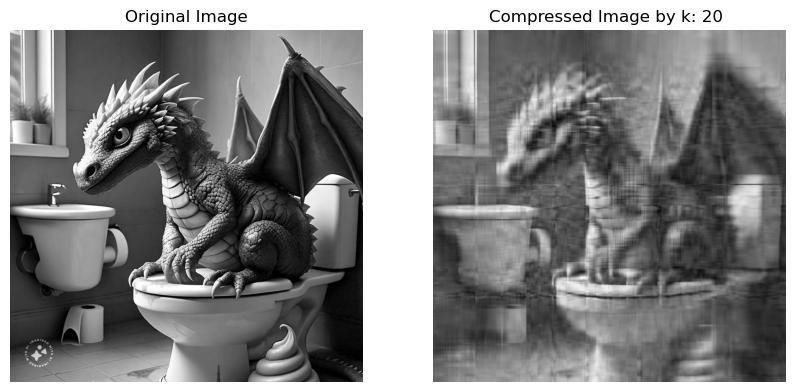

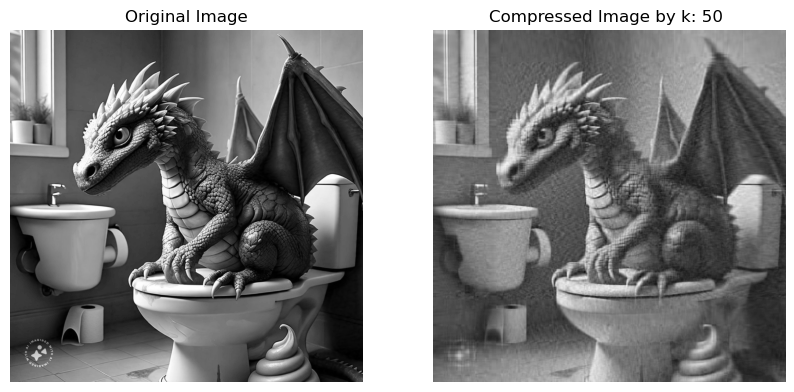

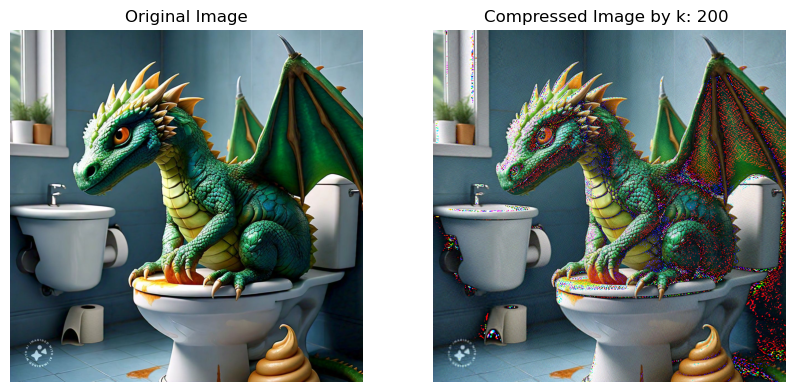

In [10]:
image_path = "jpeg for SVD.jpeg"  
comper_two(image_path,20,True)
comper_two(image_path,50,True)
comper_two(image_path,200)